In [32]:
# Required Installs : numpy nltk pandas tensorflow numpy pydot
# pip install pydot

In [33]:
# Imports 
import os
import numpy as np
import json
import pickle
import random
import nltk
import tensorflow as tf
import matplotlib.pyplot as plt


nltk.download('punkt')
nltk.download('wordnet')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional,Embedding
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize


import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /home/anirudh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/anirudh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
os.chdir('/home/anirudh/Documents/CSCE 585/ML_chatbot_csce585')
data_file = open('data/intentData/data_small.json').read()
smallData = json.loads(data_file)
smallDataDocument =np.array(smallData['train'])

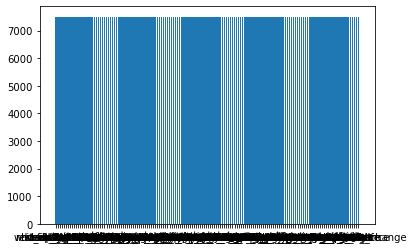

In [35]:
# Removes all duplicated words
intentTypeVector = CountVectorizer(analyzer = "word", tokenizer = None,lowercase=True, preprocessor = None, stop_words = None)
intentVectorData = intentTypeVector.fit_transform(smallDataDocument[:,1])

textVector = CountVectorizer(analyzer = "word", tokenizer = None,lowercase=True, preprocessor = None, stop_words = None)
textVectorData= textVector.fit_transform(smallDataDocument[:,0])

x = intentTypeVector.vocabulary_.keys()
y = len(intentVectorData.toarray())
plt.bar(x, y)
plt.show()
len(textVectorData.toarray())
trainDataX = textVectorData.toarray()
trainDataY = intentVectorData.toarray()
# cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
# print(cv_dataframe)
    

In [36]:
model = Sequential()
model.add(Dense(800, input_shape=(len(trainDataX[0]),), activation='relu'))
model.add(Dense(len(trainDataY[0]), activation='softmax',name='layer2'))
sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
hist = model.fit(np.array(trainDataX), np.array(trainDataY), epochs=50, batch_size=5, verbose=1)
model.save('model/chatbot_model.h5', hist)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               2927200   
_________________________________________________________________
layer2 (Dense)               (None, 150)               120150    
Total params: 3,047,350
Trainable params: 3,047,350
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
 960/1500 [==================>...........] - ETA: 5s - loss: 2.3752 - accuracy: 0.4588

KeyboardInterrupt: 

In [ ]:
model = load_model('model/chatbot_model.h5')
testDataDocument =np.array(smallData['test'])
testTextX=textVector.transform(testDataDocument[:,0]).toarray()
testTextY=intentTypeVector.transform(testDataDocument[:,1]).toarray()

score = model.evaluate(testTextX, np.array(testTextY),batch_size=128,verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)


# print(testDataDocument[0,0])
# predictions=model.predict(testTextX)[0]
# ERROR_THRESHOLD = 0.1
# results = [[i,r] for i,r in enumerate(predictions) if r>ERROR_THRESHOLD]
# results[0]
# print(smallDataDocument[results[0][0],1])
# print(testDataDocument[0,1])

Test loss: 0.7930943965911865 / Test accuracy: 0.8688889145851135
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
